In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Number of students
n_students = 100

# Generate student IDs
student_ids = range(1, n_students + 1)

# Fake names
names = [f"Student_{i}" for i in student_ids]

# Randomly assign classes
classes = np.random.choice(["10A", "10B", "10C"], size=n_students)

# Cognitive skills (0–100)
comprehension = np.random.randint(40, 100, size=n_students)
attention = np.random.randint(30, 100, size=n_students)
focus = np.random.randint(35, 100, size=n_students)
retention = np.random.randint(30, 100, size=n_students)

# Engagement time (minutes per week)
engagement_time = np.random.randint(60, 300, size=n_students)

# Assessment score = weighted average of skills + noise
assessment_score = (
    0.3 * comprehension +
    0.25 * attention +
    0.25 * focus +
    0.2 * retention +
    np.random.normal(0, 5, n_students)  # random noise
).astype(int)

# Build DataFrame
df = pd.DataFrame({
    "student_id": student_ids,
    "name": names,
    "class": classes,
    "comprehension": comprehension,
    "attention": attention,
    "focus": focus,
    "retention": retention,
    "engagement_time": engagement_time,
    "assessment_score": assessment_score
})

# Save CSV
df.to_csv("students_dataset.csv", index=False)

# Show first 5 rows
print(df.head())


   student_id       name class  comprehension  attention  focus  retention  \
0           1  Student_1   10C             83         32     51         92   
1           2  Student_2   10A             47         99     67         48   
2           3  Student_3   10C             63         56     82         87   
3           4  Student_4   10C             50         38     93         84   
4           5  Student_5   10A             90         91     56         91   

   engagement_time  assessment_score  
0              236                70  
1              159                69  
2              199                73  
3              248                64  
4              292                74  


In [2]:
print(df.tail())

    student_id         name class  comprehension  attention  focus  retention  \
95          96   Student_96   10A             72         50     50         46   
96          97   Student_97   10A             40         77     47         91   
97          98   Student_98   10C             96         49     64         42   
98          99   Student_99   10A             66         37     53         88   
99         100  Student_100   10A             96         36     51         48   

    engagement_time  assessment_score  
95              200                54  
96              279                71  
97              185                63  
98              117                57  
99              207                57  


Shape of dataset: (100, 9)

First 5 rows:
    student_id       name class  comprehension  attention  focus  retention  \
0           1  Student_1   10C             83         32     51         92   
1           2  Student_2   10A             47         99     67         48   
2           3  Student_3   10C             63         56     82         87   
3           4  Student_4   10C             50         38     93         84   
4           5  Student_5   10A             90         91     56         91   

   engagement_time  assessment_score  
0              236                70  
1              159                69  
2              199                73  
3              248                64  
4              292                74  

Summary statistics:
        student_id  comprehension   attention       focus   retention  \
count  100.000000     100.000000  100.000000  100.000000  100.000000   
mean    50.500000      69.730000   63.430000   69.810000   64.290000   
std     29.01149

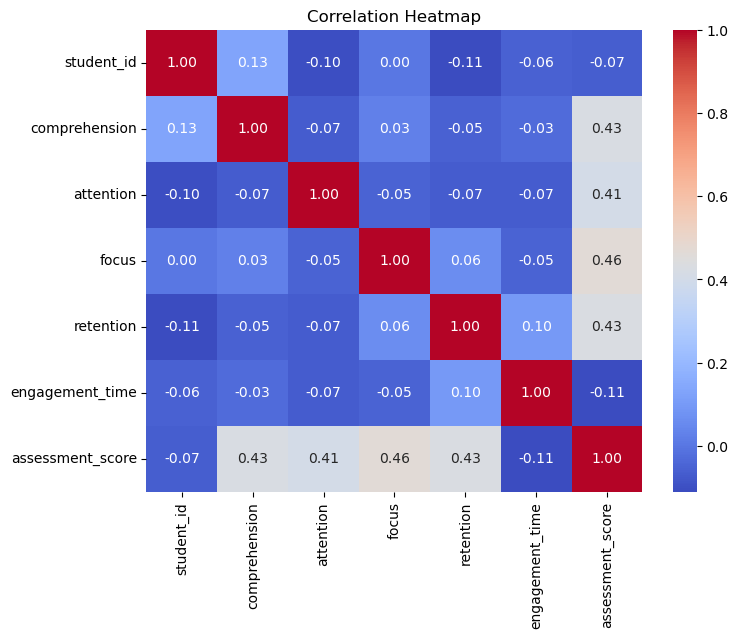

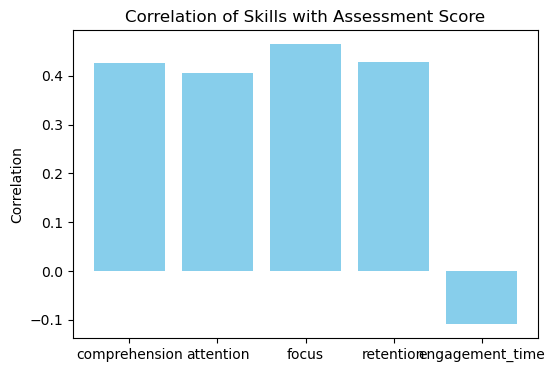

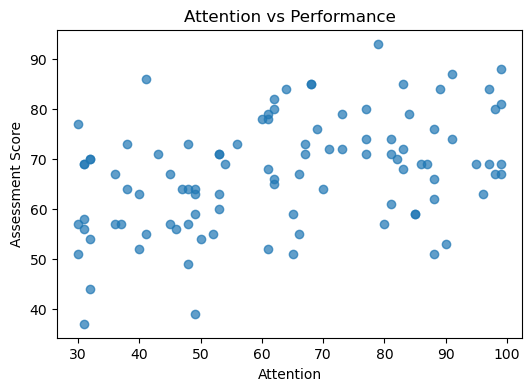

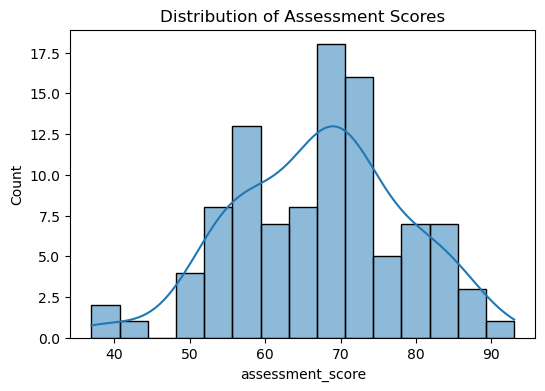

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("students_dataset.csv")

# --- Basic Overview ---
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nSummary statistics:\n", df.describe())

# --- Correlation Matrix (numeric only) ---
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# --- Skill vs Assessment Score (Bar plot) ---
numeric_cols = df.select_dtypes(include='number').columns.tolist()
skills = [col for col in numeric_cols if col not in ["student_id", "assessment_score"]]

avg_scores = [df[col].corr(df["assessment_score"]) for col in skills]

plt.figure(figsize=(6,4))
plt.bar(skills, avg_scores, color="skyblue")
plt.title("Correlation of Skills with Assessment Score")
plt.ylabel("Correlation")
plt.show()

# --- Scatter Plot: Attention vs Assessment Score ---
plt.figure(figsize=(6,4))
plt.scatter(df["attention"], df["assessment_score"], alpha=0.7)
plt.xlabel("Attention")
plt.ylabel("Assessment Score")
plt.title("Attention vs Performance")
plt.show()

# --- Distribution of Assessment Scores ---
plt.figure(figsize=(6,4))
sns.histplot(df["assessment_score"], bins=15, kde=True)
plt.title("Distribution of Assessment Scores")
plt.show()


In [4]:
# Step 4: Model Building (Fixed with Encoding)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Copy dataframe to avoid overwriting original
df_encoded = df.copy()

# Encode categorical columns automatically
label_encoders = {}
for col in df_encoded.select_dtypes(include=["object"]).columns:
    if col not in ["student_id", "name"]:  # skip ID and Name
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le  # store encoder for future use

# Features and Target
X = df_encoded.drop(columns=["assessment_score", "student_id", "name"])  # input features
y = df_encoded["assessment_score"]  # target

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.0

Classification Report:
               precision    recall  f1-score   support

          39       0.00      0.00      0.00       1.0
          44       0.00      0.00      0.00       1.0
          49       0.00      0.00      0.00       0.0
          51       0.00      0.00      0.00       0.0
          54       0.00      0.00      0.00       1.0
          55       0.00      0.00      0.00       0.0
          57       0.00      0.00      0.00       0.0
          58       0.00      0.00      0.00       1.0
          59       0.00      0.00      0.00       1.0
          61       0.00      0.00      0.00       0.0
          63       0.00      0.00      0.00       0.0
          64       0.00      0.00      0.00       1.0
          65       0.00      0.00      0.00       1.0
          67       0.00      0.00      0.00       2.0
          68       0.00      0.00      0.00       1.0
          69       0.00      0.00      0.00       0.0
          70       0.00      0.00      0.0

In [5]:
# Step 5: Feature Importance & Insights (fixed for seaborn warning)

plt.figure(figsize=(8,5))
sns.barplot(
    x="Importance", 
    y="Feature", 
    data=feat_imp_df, 
    hue="Feature", 
    dodge=False, 
    legend=False, 
    palette="viridis"
)
plt.title("Feature Importance in Student Assessment Prediction")
plt.show()


NameError: name 'feat_imp_df' is not defined

<Figure size 800x500 with 0 Axes>

In [7]:
# Step 6: Predictions for New Students (Final Fix)

# Example new unseen students
new_students = pd.DataFrame([
    {"class": "10A", "comprehension": 80, "attention": 75,
     "focus": 70, "retention": 65, "engagement_time": 120},
    
    {"class": "10B", "comprehension": 40, "attention": 35,
     "focus": 30, "retention": 25, "engagement_time": 60}
])

# Encode categorical columns using same encoders
for col, le in label_encoders.items():
    if col in new_students.columns:
        new_students[col] = le.transform(new_students[col])

# Predict outcomes (numeric scores directly)
predictions = model.predict(new_students)

# Show results
new_students["Predicted_Assessment_Score"] = predictions
print(new_students)


   class  comprehension  attention  focus  retention  engagement_time  \
0      0             80         75     70         65              120   
1      1             40         35     30         25               60   

   Predicted_Assessment_Score  
0                          72  
1                          51  


In [9]:
# Step 7: Create a prediction function

def predict_student(student_data):
    """
    Predicts assessment score for a single student.
    student_data = dict with keys:
      'class', 'comprehension', 'attention', 'focus', 'retention', 'engagement_time'
    """
    # Convert dict to DataFrame
    df = pd.DataFrame([student_data])
    
    # Encode categorical columns
    for col, le in label_encoders.items():
        if col in df.columns:
            df[col] = le.transform(df[col])
    
    # Predict
    prediction = model.predict(df)[0]
    return prediction


In [11]:
# Example test cases
student1 = {
    "class": "10A", "comprehension": 85, "attention": 80,
    "focus": 78, "retention": 70, "engagement_time": 130
}

student2 = {
    "class": "10B", "comprehension": 45, "attention": 40,
    "focus": 38, "retention": 30, "engagement_time": 70
}

print("Predicted Score (Student 1):", predict_student(student1))
print("Predicted Score (Student 2):", predict_student(student2))


Predicted Score (Student 1): 72
Predicted Score (Student 2): 59


In [13]:
import streamlit as st
import pandas as pd
import joblib
import os

# ------------------ File Paths ------------------
MODEL_PATH = "student_model.pkl"
ENCODER_PATH = "label_encoders.pkl"

# ------------------ Load Model & Encoders ------------------
def load_model_and_encoders():
    """Try loading saved model and encoders, else ask user to upload."""
    if os.path.exists(MODEL_PATH) and os.path.exists(ENCODER_PATH):
        model = joblib.load(MODEL_PATH)
        label_encoders = joblib.load(ENCODER_PATH)
        return model, label_encoders

    st.warning("⚠️ Model/encoder files not found! Please upload them below.")

    uploaded_model = st.file_uploader("Upload student_model.pkl", type=["pkl"])
    uploaded_encoders = st.file_uploader("Upload label_encoders.pkl", type=["pkl"])

    if uploaded_model and uploaded_encoders:
        model = joblib.load(uploaded_model)
        label_encoders = joblib.load(uploaded_encoders)
        return model, label_encoders

    return None, None


# ------------------ Prediction Function ------------------
def predict_student(model, label_encoders, student_data):
    df = pd.DataFrame([student_data])

    # Encode categorical columns
    for col, le in label_encoders.items():
        if col in df.columns:
            df[col] = le.transform(df[col])

    prediction = model.predict(df)[0]
    return prediction


# ------------------ Streamlit UI ------------------
st.set_page_config(page_title="Student Performance Predictor", page_icon="🎓", layout="centered")
st.title("🎓 Student Performance Prediction")
st.write("Enter student details to predict their **assessment score category**.")

# Load model
model, label_encoders = load_model_and_encoders()

if model is not None and label_encoders is not None:
    # Input fields
    class_choice = st.selectbox("Class", label_encoders["class"].classes_)
    comprehension = st.slider("Comprehension", 0, 100, 70)
    attention = st.slider("Attention", 0, 100, 70)
    focus = st.slider("Focus", 0, 100, 70)
    retention = st.slider("Retention", 0, 100, 70)
    engagement_time = st.slider("Engagement Time (mins)", 0, 180, 90)

    # Collect input
    student_data = {
        "class": class_choice,
        "comprehension": comprehension,
        "attention": attention,
        "focus": focus,
        "retention": retention,
        "engagement_time": engagement_time
    }

    # Prediction button
    if st.button("🔮 Predict"):
        result = predict_student(model, label_encoders, student_data)
        st.success(f"✅ Predicted Assessment Score: **{result}**")
else:
    st.info("👆 Upload both `student_model.pkl` and `label_encoders.pkl` to continue.")


2025-09-17 13:49:34.133 
  command:

    streamlit run C:\Users\Lalitha\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
C:\Users\Lalitha\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Lalitha\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Lalitha\anaconda3\Lib\site-packages\sklearn\b

In [14]:
dir 

<function dir>

In [15]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 2047-6F97

 Directory of C:\Users\Lalitha\igebra

17-09-2025  13:48    <DIR>          .
17-09-2025  13:37    <DIR>          ..
17-09-2025  13:03    <DIR>          .ipynb_checkpoints
17-09-2025  13:42             2,712 app.py
17-09-2025  13:42               757 label_encoders.pkl
17-09-2025  13:42             8,641 student_model.pkl
17-09-2025  13:48             3,867 students_dataset.csv
17-09-2025  13:48           200,459 Untitled.ipynb
               5 File(s)        216,436 bytes
               3 Dir(s)  48,928,976,896 bytes free


In [16]:
st.header("📊 Overview Stats")
st.write(df.describe())  # show mean, std, min, max


In [23]:
st.subheader("Average Skill Scores")
avg_skills = df[["comprehension", "attention", "focus", "retention", "engagement_time"]].mean()
st.bar_chart(avg_skills)


DeltaGenerator()

DeltaGenerator()

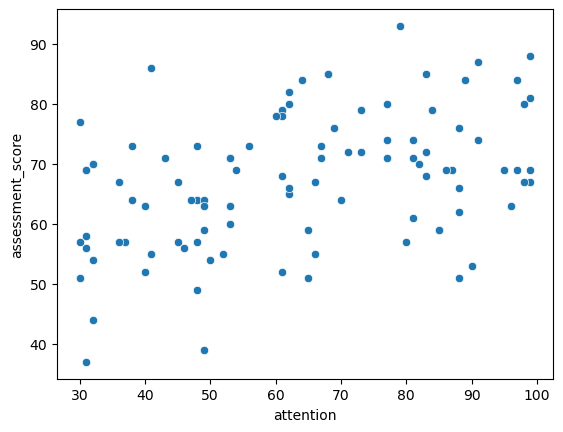

In [25]:
st.subheader("Attention vs Assessment Score")
fig, ax = plt.subplots()
sns.scatterplot(x="attention", y="assessment_score", data=df, ax=ax)
st.pyplot(fig)


In [27]:
import plotly.express as px

student = df.iloc[0]  # example student
fig = px.line_polar(
    r=[student.comprehension, student.attention, student.focus, student.retention, student.engagement_time],
    theta=["Comprehension", "Attention", "Focus", "Retention", "Engagement Time"],
    line_close=True
)
st.plotly_chart(fig)


DeltaGenerator()

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

skills = ["comprehension", "attention", "focus", "retention", "engagement_time"]
X_scaled = StandardScaler().fit_transform(df[skills])
kmeans = KMeans(n_clusters=3, random_state=42)
df["persona"] = kmeans.fit_predict(X_scaled)

st.subheader("Student Learning Personas")
st.bar_chart(df["persona"].value_counts())


C:\Users\Lalitha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\Lalitha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Lalitha\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lalitha\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Lalitha\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

DeltaGenerator()